<a href="https://colab.research.google.com/github/asandeep1/ECE-8803-HW1/blob/main/ECE_8803_HW1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 Part b)

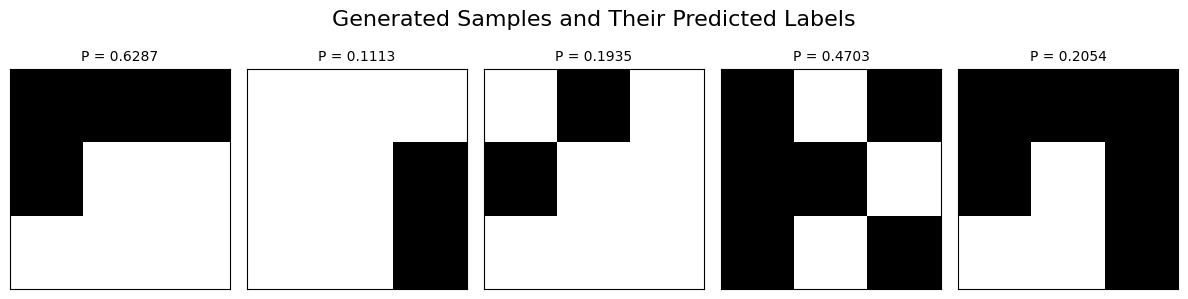

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

def plot_image_with_label(image_flat, label, ax):
    image_grid = image_flat.reshape(3, 3)
    ax.imshow(image_grid, cmap='gray', vmin=0, vmax=1)
    ax.set_title(f'P = {label:.4f}', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

# 0 means black, 1 means white
def generate_img(sampleSize):
    imgs = []
    labels = []
    seen_imgs = set()
    total_blk_pixels = 2304

    while len(imgs) < sampleSize:
        img_flat = np.random.randint(0, 2, 9)
        img_tup = tuple(img_flat)

        if img_tup not in seen_imgs:
            num_blk_pxls = 9 - np.sum(img_flat)
            prob_img = num_blk_pxls/total_blk_pixels

            imgs.append(img_flat)
            labels.append(prob_img)
            seen_imgs.add(img_tup)
    return np.array(imgs), np.array(labels)

def buildMLP(xTrain, yTrain):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(9,)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='mse')
    model.fit(xTrain, yTrain, epochs=50, batch_size=16, verbose=0)
    return model

def gen_Samples(model, sampleSize, num_proposals=10000):
    samples = []
    while len(samples) < sampleSize:
        gen_imgs = np.random.randint(0, 2, (num_proposals, 9))
        predict_labels = model.predict(gen_imgs, verbose=0).flatten()

        max_prob = np.max(predict_labels)
        norm_probs = predict_labels / max_prob if max_prob > 0 else predict_labels

        # rejection sampling
        for i in range(num_proposals):
            if np.random.rand() < norm_probs[i] and len(samples) < sampleSize:
                samples.append(gen_imgs[i])
    return np.array(samples)

# Create training data
x_train, x_labels = generate_img(200)

# Train the model
myMLP = buildMLP(x_train, x_labels)

# Generate new samples
generated_imgs = gen_Samples(myMLP, 5)

# Visualization of samples
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
fig.suptitle('Generated Samples and Their Predicted Labels', fontsize=16)

for i in range(5):
    plot_image_with_label(generated_imgs[i], labels[i], axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.tight_layout()
plt.show()

Problem 1 Part c)

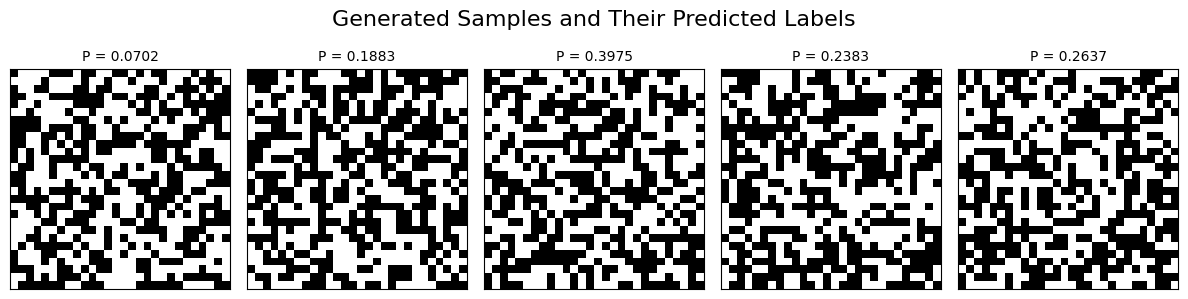

<Figure size 640x480 with 0 Axes>

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

def plot_image_with_label(image_flat, label, ax):
    image_grid = image_flat.reshape(28, 28)
    ax.imshow(image_grid, cmap='gray', vmin=0, vmax=1)
    ax.set_title(f'P = {label:.4f}', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

# 0 means black, 1 means white
# Generating image with size 28x28 instead of 3x3 would mean that there are

numPxlsPerImg = 28*28

def generate_img(sampleSize):
    imgs = []
    labels = []
    seen_imgs = set()
    sampleSpace = 2**numPxlsPerImg
    total_blk_pixels = numPxlsPerImg*2**(numPxlsPerImg-1)

    while len(imgs) < sampleSize:
        img_flat = np.random.randint(0, 2, numPxlsPerImg)
        img_tup = tuple(img_flat)

        if img_tup not in seen_imgs:
            num_blk_pxls = numPxlsPerImg - np.sum(img_flat)
            prob_img = num_blk_pxls/total_blk_pixels

            imgs.append(img_flat)
            labels.append(prob_img)
            seen_imgs.add(img_tup)
    return np.array(imgs), np.array(labels)

def buildMLP(xTrain, yTrain):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(numPxlsPerImg,)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='mse')
    model.fit(xTrain, yTrain, epochs=50, batch_size=16, verbose=0)
    return model

def gen_Samples(model, sampleSize, num_proposals=10000):
    samples = []
    labels = []
    while len(samples) < sampleSize:
        gen_imgs = np.random.randint(0, 2, (num_proposals, numPxlsPerImg))
        predict_labels = model.predict(gen_imgs, verbose=0).flatten()

        max_prob = np.max(predict_labels)
        norm_probs = predict_labels / max_prob if max_prob > 0 else predict_labels

        # rejection sampling
        for i in range(num_proposals):
            if np.random.rand() < norm_probs[i] and len(samples) < sampleSize:
                samples.append(gen_imgs[i])
                labels.append(norm_probs[i])
    return np.array(samples), labels

# Create training data
x_train, x_labels = generate_img(200)

# Train the model
myMLP = buildMLP(x_train, x_labels)

# Generate new samples
generated_imgs, labels = gen_Samples(myMLP, 5)

# Visualization of samples
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
fig.suptitle('Generated Samples and Their Predicted Labels', fontsize=16)

for i in range(5):
    plot_image_with_label(generated_imgs[i], labels[i], axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.tight_layout()
plt.show()

Increasing the number of dimensions while sticking with the same sampling number to train the data will not yield good results as evident in the images. The number of black pixels with P = 0.0702 is about the same, if not more than that for P = 0.2383 when in reality, it should be significantly lower with the probability being directly proportional to the number of black pixels in the sample. Dimensions of 28x28 would mean there are 2^784 possibilities and using only 200 samples to train is ridiculously small, therefore the MLP is not trained with sufficient data.

Since the MLP is discriminative, it won't be able to generalize and is not designed to be a generative model and will fail if the data is already sparse like in the 28x28 case. So, it won't be able to create new images that align with the data it's been trained with.

In [23]:
!pip install tensorflow-datasets

Problem 2

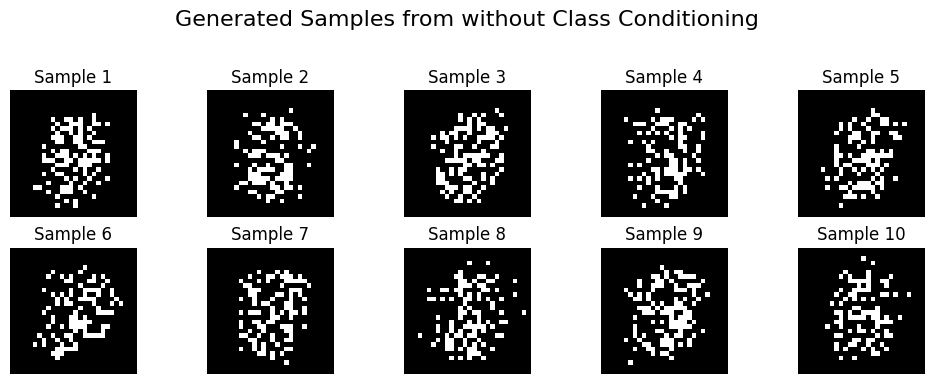

In [29]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_data, info = tfds.load('binarized_mnist', split='train', shuffle_files=True, with_info=True)
test_data = tfds.load('mnist', split='test')

# Pixel-independent generative model used: Bernoulli Naive Bayes. The generative model used for the python code is without condition as this data set did not come with labels.
train_img = []

for item in train_data:
    train_img.append(item['image'].numpy())

train_img = np.squeeze(np.array(train_img))

theta = np.mean(train_img, axis=0)
num_class = 10

generated_samples = np.zeros((num_class, train_img.shape[1], train_img.shape[2]))

for i in range(num_class):
    random_matrix = np.random.uniform(0, 1, size=(28, 28))
    generated_image = (random_matrix < theta).astype(np.float32)
    generated_samples[i] = generated_image

# Display the generated samples.
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
fig.suptitle('Generated Samples from without Class Conditioning', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(generated_samples[i], cmap='gray')
    ax.set_title(f'Sample {i+1}')
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The generated samples do not look like numbers at all and this aligns with the fact that it used probabilities without any class conditioning and that each pixel's probability is independent of all others and learns the average image of the entire dataset. It doesn't learn any class specific structure. Please note that the pixel-independent generative model used: Bernoulli Naive Bayes. The generative model used for the python code is without conditioning as this data set did not come with labels while the theoretical calculations in the report assumed class conditioning. All these images look "blurry", and in order to yield better results, class conditioning can be done as the probability would be conditioned according to or specific to the class.